## Density-based spatial clustering of applications with noise (DBSCAN) clustering method

It comprises of many different methods based on different distance measures. E.g. `K-Means` (distance between points), `Affinity propagation` (graph distance), `Mean-shift` (distance between points), `DBSCAN` (distance between nearest points), `Gaussian mixtures` (Mahalanobis distance to centers), `Spectral clustering` (graph distance), etc.

All clustering algorithms exploit the "calculating similarities" approach. We use these similarities to cluster data points into groups.

![](https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png)

In `K-Means` algorithm, every point `must be` a `part of some cluster` eventually, even if the points are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements. A slight change in data points might affect the clustering outcome. With DBSCAN algorithm, we overcome this problem. For DBSCAN algorithm there is `no need` to define `k (number of clusters)`. All you need is a function to `calculate` the `distance` between values and some guidance for what amount of distance is considered “close”.

**Density-Based Clustering** refers to `unsupervised` learning methods that identify distinctive groups/clusters in the data, based on the idea that a `cluster` in data space is a contiguous region of `high point density`, separated from other such clusters by contiguous regions of `low point density`.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is `containing noise` and `outliers`.

The DBSCAN algorithm uses two parameters:

* **minPts**: The `minimum number of points` (a `threshold`) clustered together for a region to be considered dense.
* **eps (ε)**: A `distance measure` that will be used to `locate` the `points` in the `neighborhood of any point`.

![](https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png)

* **Reachability** in terms of density: establishes a `point to be reachable` from another if it lies within a particular distance (`eps`) from it.

* **Connectivity**, on the other hand, involves a transitivity based `chaining-approach` to determine whether `points are located in a particular cluster`. For example, `p` and `q` points could be connected if `p->r->s->t->q`, where a->b means b is in the neighborhood of a.

There are three types of points after the DBSCAN clustering is complete:

* **Core**: This is a point that has `at least m points` within `distance n` from `itself`.
* **Border**: This is a point that has `at least one Core` point at a `distance n`.
* **Noise**: This is a point that is `neither` a `Core nor a Border`. And it has `less than m points` within distance n from itself.




### DBSCAN Clustering Algorithm Steps

* The algorithm proceeds by `arbitrarily` picking up a `point` in the dataset (until all points have been visited).
* If there are `at least ‘minPoint’` points within a `radius of ‘ε’` to the point then we consider all these points to be part of the `same cluster`.
* The clusters are then `expanded` by `recursively` repeating the `neighborhood calculation` for each neighboring point

In [28]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data - 750 spherical training data points
centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [29]:
import matplotlib.pyplot as plt

def plot_dataset_scattering(X, y, n_features):
    for class_val in range(n_features):
        row_ix = np.where(y==class_val)
        # Create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    plt.show()

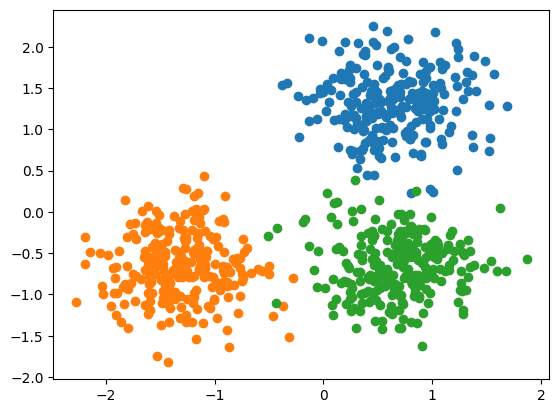

In [30]:
plot_dataset_scattering(X ,labels_true, n_features=3)

In [31]:
EPS = 0.3
MIN_PTS = 10

In [32]:
dbscan = DBSCAN(eps=EPS, min_samples=MIN_PTS).fit(X)

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

In [33]:
def show_DBSCAN_analysis(dbscan_model, y_true):
  labels = dbscan.labels_

  # Number of clusters in labels, ignoring noise if present
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)  # Get how many -1 in labels

  print('Estimated number of clusters: %d' % n_clusters)
  print('Estimated number of noise points: %d' % n_noise)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(y_true, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(y_true, labels))
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(y_true, labels))
  print("Adjusted Mutual Information: %0.3f"
        % metrics.adjusted_mutual_info_score(y_true, labels))
  print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

### Parameter Estimation

For DBSCAN, the parameters ε and minPts are needed.

* **minPts**: As a rule of thumb, a minimum minPts can be derived from the `number of dimensions D` in the data set, as `minPts ≥ D + 1`. The low value `minPts = 1 does not make sense`, as then `every point on its own` will already be a `cluster`. With `minPts ≤ 2`, the result will be the same as of `hierarchical clustering` with the `single link metric`, with the dendrogram cut at height ε. Therefore, minPts must be chosen `at least 3`. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, `minPts = 2·dim` can be used.

* **ε**: The value for ε can then be chosen by using a `k-distance graph`, plotting the distance to the `k = minPts-1` nearest neighbor ordered from the `largest to the smallest value`. Good values of `ε` are where this plot shows an “`elbow`”: if ε is chosen much `too small`, a large part of the `data will not be clustered`; whereas for a `too high` value of ε, clusters will `merge` and the majority of `objects` will be in the `same cluster`. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.

* **Distance function**: The choice of distance function is tightly `linked to the choice of ε`, and has a major impact on the outcomes. In general, it will be necessary to first identify a reasonable measure of similarity for the data set, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set.

In [36]:
show_DBSCAN_analysis(dbscan, labels_true)

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


In [41]:
def plot_DBSCAN_results(dbscan_model, data):
  labels = dbscan.labels_
  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

  # Number of clusters in labels, ignoring noise if present
  n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = data[class_member_mask & core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = data[class_member_mask & ~core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  plt.title('Estimated number of clusters: %d' % n_clusters)
  plt.show()

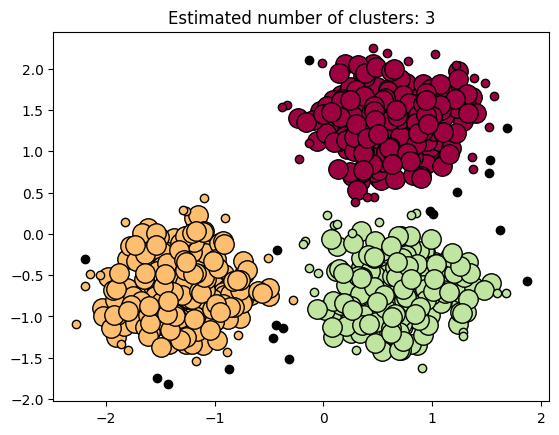

In [42]:
plot_DBSCAN_results(dbscan, X)

In [43]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

In [46]:
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [47]:
show_DBSCAN_analysis(dbscan, y)

Estimated number of clusters: 2
Estimated number of noise points: 11
Homogeneity: 1.000
Completeness: 0.913
V-measure: 0.954
Adjusted Rand Index: 0.971
Adjusted Mutual Information: 0.954
Silhouette Coefficient: 0.158


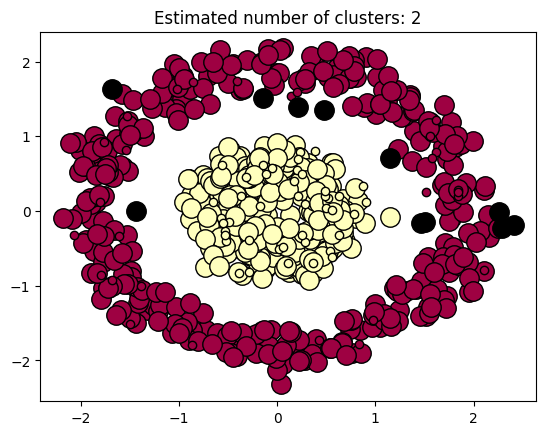

In [48]:
plot_DBSCAN_results(dbscan, X)

In [59]:
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)

Estimated number of clusters: 11
Estimated number of noise points: 21
Homogeneity: 0.992
Completeness: 0.386
V-measure: 0.555
Adjusted Rand Index: 0.561
Adjusted Mutual Information: 0.553
Silhouette Coefficient: 0.349


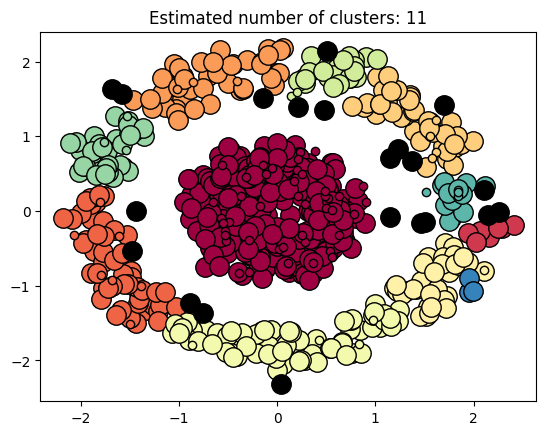

In [60]:
show_DBSCAN_analysis(dbscan, y)
plot_DBSCAN_results(dbscan, X)

### Reference

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html